In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

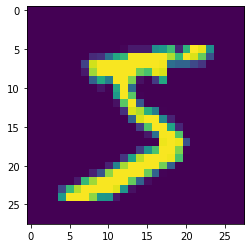

In [6]:
np.set_printoptions(threshold=np.inf, linewidth=280)
print(x_train[0])
plt.imshow(x_train[0])

In [7]:
print(x_train.shape)

x_train=x_train.reshape(60000, 28, 28, 1)
x_train=x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test=x_test/255.0

print(x_train.shape)


(60000, 28, 28)
(60000, 28, 28, 1)


In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')

])

In [13]:
#lets define loss and optimize function for back propogation
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics = ['accuracy'])

In [20]:
history  = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9987
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0042 - accuracy: 0.9987
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9991
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0029 - accuracy: 0.9991
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9990
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0025 - accuracy: 0.9989
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0016 - accuracy: 0.9994
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.002

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


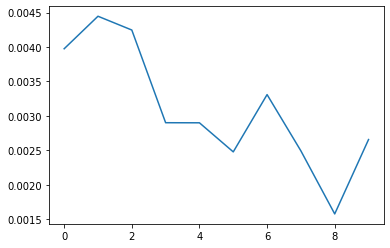

In [21]:
plt.plot(history.history['loss'])
model.summary()

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9874


[0.07807540893554688, 0.9873999953269958]